In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#for feature selection 
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset = pd.read_csv("C:\\Users\\user\\Documents\\X_train.csv")

In [3]:
dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [4]:
y_train = dataset[['SalePrice']]

In [5]:
x_train = dataset.drop(['Id','SalePrice'],axis=1)

In [6]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [7]:
## Apply feature selection
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [8]:
feature_sel_model.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [9]:
# lets print no of total selected feature
selected_feature = x_train.columns[feature_sel_model.get_support()]

In [10]:
selected_feature

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition'],
      dtype='object')

In [11]:
print("Total feature:{}".format(x_train.shape[1]))
print("Selected feature:{}".format(len(selected_feature)))
print("feature with coefficients shrank to zero:{}".format(np.sum(feature_sel_model.estimator_.coef_ == 0)))


Total feature:82
Selected feature:21
feature with coefficients shrank to zero:61


In [12]:
x_train[selected_feature].head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.235294,0.75,0.636364,0.666667,0.098361,0.0,0.75,0.25,1.00,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.50,1.0,0.75
1,0.000000,0.75,0.500000,0.555556,0.524590,0.0,0.75,1.00,1.00,1.0,0.503056,0.470245,0.000000,0.333333,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
2,0.235294,0.75,0.636364,0.666667,0.114754,0.0,0.75,0.50,1.00,1.0,0.383441,0.593095,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
3,0.294118,0.75,0.727273,0.666667,0.606557,0.0,0.50,0.25,0.75,1.0,0.399941,0.579157,0.333333,0.666667,0.333333,0.8,0.4,0.333333,0.75,1.0,0.00
4,0.235294,0.75,1.000000,0.777778,0.147541,0.0,0.75,0.75,1.00,1.0,0.466237,0.666523,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.75,1.0,0.75


In [13]:
x_train = x_train[selected_feature]

In [14]:
x_train.shape

(1460, 21)

In [15]:
len(y_train)

1460

In [16]:
x = x_train.copy()

In [17]:
x.head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.235294,0.75,0.636364,0.666667,0.098361,0.0,0.75,0.25,1.00,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.50,1.0,0.75
1,0.000000,0.75,0.500000,0.555556,0.524590,0.0,0.75,1.00,1.00,1.0,0.503056,0.470245,0.000000,0.333333,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
2,0.235294,0.75,0.636364,0.666667,0.114754,0.0,0.75,0.50,1.00,1.0,0.383441,0.593095,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
3,0.294118,0.75,0.727273,0.666667,0.606557,0.0,0.50,0.25,0.75,1.0,0.399941,0.579157,0.333333,0.666667,0.333333,0.8,0.4,0.333333,0.75,1.0,0.00
4,0.235294,0.75,1.000000,0.777778,0.147541,0.0,0.75,0.75,1.00,1.0,0.466237,0.666523,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.75,1.0,0.75


In [18]:
y = y_train.copy()

In [19]:
y

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [22]:
X_train.shape,X_test.shape

((1022, 21), (438, 21))

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [24]:
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [25]:
mse=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=10)

In [26]:
mse

array([-0.0202134 , -0.01427571, -0.02611695, -0.03494028, -0.02387154,
       -0.01472413, -0.01456272, -0.01659378, -0.01882337, -0.01369331])

In [27]:
np.mean(mse)

-0.019781519344755367

In [28]:
##Prediction
reg_pred = regression.predict(X_test)

In [29]:
reg_pred

array([[11.78786961],
       [12.71882036],
       [11.65714906],
       [11.92525482],
       [12.72271874],
       [11.24781379],
       [12.32170098],
       [11.90386956],
       [11.23717205],
       [11.71204476],
       [11.90918191],
       [11.67752166],
       [11.42429049],
       [12.26585244],
       [12.06519598],
       [11.81007772],
       [12.23220674],
       [11.75631136],
       [11.60522017],
       [12.30003513],
       [12.11763409],
       [12.28003133],
       [12.13641151],
       [11.76001809],
       [12.28327378],
       [11.90743915],
       [12.21217532],
       [11.62612697],
       [12.10772195],
       [12.22941801],
       [11.73862748],
       [12.51108866],
       [12.21672246],
       [11.5687303 ],
       [12.49825845],
       [11.8828939 ],
       [11.97991518],
       [12.2947619 ],
       [12.58600144],
       [11.42425405],
       [11.72820212],
       [12.37306083],
       [11.62241567],
       [12.65159367],
       [11.7480974 ],
       [11

In [30]:
intercept_1 = regression.intercept_

In [31]:
intercept_1

array([10.44852858])

In [32]:
print(pd.Series(regression.coef_[0], index = x.columns))

MSSubClass      -0.127119
MSZoning         0.079374
Neighborhood     0.217330
OverallQual      0.538136
YearRemodAdd    -0.070013
RoofStyle        0.017282
BsmtQual         0.110702
BsmtExposure     0.102050
HeatingQC        0.047158
CentralAir       0.091146
1stFlrSF         0.099735
GrLivArea        1.093079
BsmtFullBath     0.197357
KitchenQual      0.084967
Fireplaces       0.094292
FireplaceQu      0.025075
GarageType       0.041103
GarageFinish     0.012384
GarageCars       0.228813
PavedDrive       0.025347
SaleCondition    0.083897
dtype: float64


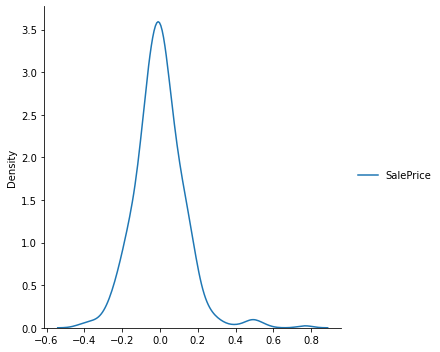

In [33]:
import seaborn as sns
sns.displot(reg_pred-Y_test,kind='kde')

In [34]:
from sklearn.metrics import r2_score

In [35]:
score = r2_score(reg_pred,Y_test)

In [36]:
score

0.876211192457995

# Ridge

In [37]:
from sklearn.linear_model import Ridge

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
ridge_regressor = Ridge()

In [40]:
ridge_regressor

Ridge()

In [41]:
parameters = {'alpha':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90]}
ridgecv = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40,
                                   50, 60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [42]:
print(ridgecv.best_params_)

{'alpha': 1}


In [43]:
ridgecv.best_score_

-0.020454707515344096

In [44]:
ridge_pred = ridgecv.predict(X_test)

In [45]:
ridge_pred

array([[11.79281003],
       [12.70150318],
       [11.67210167],
       [11.92134766],
       [12.7279312 ],
       [11.27111899],
       [12.317902  ],
       [11.9114451 ],
       [11.25964955],
       [11.70221426],
       [11.89874493],
       [11.68325995],
       [11.44121749],
       [12.26843751],
       [12.0667363 ],
       [11.81667655],
       [12.23098512],
       [11.76449072],
       [11.61445551],
       [12.29410886],
       [12.11576105],
       [12.26885978],
       [12.12837749],
       [11.76792882],
       [12.27888298],
       [11.92625122],
       [12.21396598],
       [11.6399312 ],
       [12.10891378],
       [12.25371342],
       [11.73756311],
       [12.50401529],
       [12.1935261 ],
       [11.57736078],
       [12.50194282],
       [11.88763703],
       [11.95836753],
       [12.29006522],
       [12.57172624],
       [11.43005564],
       [11.73110948],
       [12.36208562],
       [11.62742132],
       [12.65960036],
       [11.74885199],
       [11

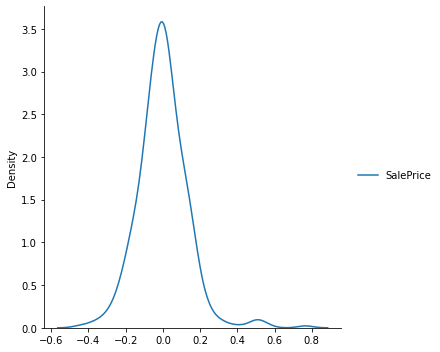

In [46]:
sns.displot(ridge_pred-Y_test,kind='kde')

In [47]:
score_1 = r2_score(ridge_pred,Y_test)

In [48]:
score_1

0.8717306468253215

# Decission tree

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
Parameter ={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter' :['best', 'random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features':['auto', 'sqrt', 'log2'],
    
}
Regressor = DecisionTreeRegressor()

In [51]:
Regressor_cv = GridSearchCV(Regressor,param_grid=Parameter,cv=5,scoring='neg_mean_squared_error')

In [52]:
Regressor_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [53]:
Regressor_cv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'random'}

In [54]:
Y_pred = Regressor_cv.predict(X_test)

In [55]:
#Y_pred

In [56]:
r2_score(Y_pred ,Y_test)

0.7242674301810798

# Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
rf_regressor = RandomForestRegressor(bootstrap=True,oob_score=True)

In [60]:
Parameter_1 ={
    'n_estimators':[10,20,30,40,50,100,200],
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features':[ 'sqrt', 'log2']
    
}

In [61]:
rf_regressor_cv = GridSearchCV(rf_regressor,Parameter_1,cv=5,scoring='neg_mean_squared_error')

In [62]:
rf_regressor_cv.fit(X_train,Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.


GridSearchCV(cv=5, estimator=RandomForestRegressor(oob_score=True),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [63]:
rf_regressor_cv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 12,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [64]:
rf_regressor_cv.best_score_

-0.020253029892859077

In [65]:
rf_pred = rf_regressor_cv.predict(X_test)

In [66]:
#rf_pred 

In [67]:
r2_score(rf_pred,Y_test)

0.8598477292458901

In [68]:
Y1_te = Y_test.copy().reset_index()

In [69]:
Y1_te.head()

,index,SalePrice
0,892,11.947949
1,1105,12.691580
2,413,11.652687
3,522,11.976659
4,1036,12.661914


In [70]:
Y1_te = Y1_te.drop('index',axis=1)

In [71]:
Y1_te.head()

,SalePrice
0,11.947949
1,12.691580
2,11.652687
3,11.976659
4,12.661914


In [74]:
rf_df = pd.DataFrame({'SalePrice':rf_pred} )

In [75]:
rf_df.head()

,SalePrice
0,11.843490
1,12.627285
2,11.733537
3,12.005715
4,12.672146


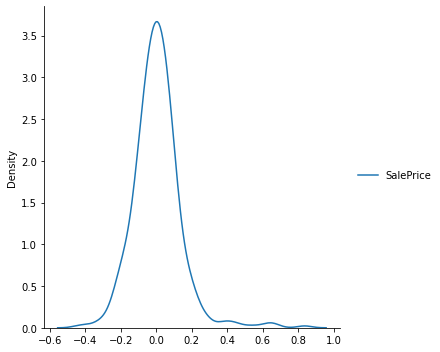

In [76]:
sns.displot(rf_df-Y1_te,kind='kde')